# Environment

In [4]:
import gc
import os
import gc
import sys
import importlib
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt 

# Set the current working directory
os.chdir('/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_SRRM3')

In [5]:
input_dir = './DATA/Herring'

# Load data

In [18]:
adata = sc.read_h5ad(os.path.join(input_dir, 'Processed_data_RNA-all_full-counts-and-downsampled-CPM.h5ad'))

In [19]:
pd.set_option('display.max_columns', None)
adata.obs.head()

,batch,RL#,age,chem,concat_id,numerical_age,stage_id,Sex,Race,PMI,Brain Regions*,Cause of Death,ICD-10 Code,ICD-10 category,Oxygen/No Oxygen,Date-of-Collection,Collection_year,Library Prep Date,Library Prep Lot,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,doublet_score,log10_gene_counts,log10_UMI_counts,percent_mito,percent_ribo,n_counts,leiden,mat/dev,cell_type,major_clust,sub_clust,combined-leiden,Astro_GFAP_dev-traj,Astro_SLC1A2_dev-traj,L2_CUX2_LAMP5_dev-traj,L3_CUX2_PRSS12_dev-traj,L4_RORB_LRRK1_dev-traj,L4_RORB_MET_dev-traj,L4_RORB_MME_dev-traj,L5-6_THEMIS_CNR1_dev-traj,L5-6_THEMIS_NTNG2_dev-traj,L5-6_TLE4_HTR2C_dev-traj,L5-6_TLE4_SCUBE1_dev-traj,L5-6_TLE4_SORCS1_dev-traj,Micro_dev-traj,OPC_dev-traj,OPC_MBP_dev-traj,Oligo_dev-traj,Vas_CLDN5_dev-traj,Vas_PDGFRB_dev-traj,Vas_TBX18_dev-traj,CCK_RELN_dev-traj,CCK_SORCS1_dev-traj,CCK_SYT6_dev-traj,ID2_CSMD1_dev-traj,LAMP5_CCK_dev-traj,LAMP5_NDNF_dev-traj,LAMP5_NOS1_dev-traj,PV_SCUBE3_dev-traj,PV_SST_dev-traj,PV_SULF1_dev-traj,PV_WFDC2_dev-traj,SST_ADGRG6_dev-traj,SST_B3GAT2_dev-traj,SST_BRINP3_dev-traj,SST_CALB1_dev-traj,SST_NPY_dev-traj,SST_STK32A_dev-traj,SST_TH_dev-traj,VIP_ABI3BP_dev-traj,VIP_ADAMTSL1_dev-traj,VIP_CHRM2_dev-traj,VIP_CRH_dev-traj,VIP_DPP6_dev-traj,VIP_HS3ST3A1_dev-traj,VIP_KIRREL3_dev-traj,VIP_PCDH20_dev-traj,mj_dev_traj_L4_RORB,mj_dev_traj_L2-3_CUX2,mj_dev_traj_SST,mj_dev_traj_Astro,mj_dev_traj_L5-6_TLE4,mj_dev_traj_L5-6_THEMIS,mj_dev_traj_VIP,mj_dev_traj_OPC,mj_dev_traj_PV,mj_dev_traj_PV_SCUBE3,mj_dev_traj_ID2,mj_dev_traj_Oligo,mj_dev_traj_LAMP5_NOS1,mj_dev_traj_Micro,mj_dev_traj_Vas,mj_dev_traj_Poor-Quality
AAACCTGAGAGTCGGT-RL1612_34d_v2,RL1612_34d_v2,RL1612,34d,v2,0,0.093151,Neonatal,M,AA,5,BA9,Probably overlay,R090,Asphyxia,Oxygen,10.04.2011,2011.0,20.11.2018,5,1696,7.436617,3079.0,8.032685,0.148997,3.236537,3.507181,0.005910,0.008087,3079.0,10,dev,PN,L4_RORB,L4_RORB_dev-2,10,None,None,None,None,dev-traj,dev-traj,dev-traj,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,mj_dev_traj,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
AAACCTGAGCCGCCTA-RL1612_34d_v2,RL1612_34d_v2,RL1612,34d,v2,0,0.093151,Neonatal,M,AA,5,BA9,Probably overlay,R090,Asphyxia,Oxygen,10.04.2011,2011.0,20.11.2018,5,3931,8.276903,9597.0,9.169310,0.090722,3.600210,4.008770,0.004802,0.008526,9597.0,15,dev,PN,L2-3_CUX2,L2-3_CUX2_dev-2,15,None,None,dev-traj,dev-traj,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,mj_dev_traj,None,None,None,None,None,None,None,None,None,None,None,None,None,None
AAACCTGAGTCGAGTG-RL1612_34d_v2,RL1612_34d_v2,RL1612,34d,v2,0,0.093151,Neonatal,M,AA,5,BA9,Probably overlay,R090,Asphyxia,Oxygen,10.04.2011,2011.0,20.11.2018,5,1426,7.263330,2185.0,7.689829,0.096154,3.161368,3.362859,0.009107,0.007372,2186.0,23,IN,IN,SST,SST_CALB1_dev,IN1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,dev-traj,None,None,None,None,None,None,None,None,None,None,None,None,None,mj_dev_traj,None,None,None,None,None,None,None,None,None,None,None,None,None
AAACCTGAGTGAACAT-RL1612_34d_v2,RL1612_34d_v2,RL1612,34d,v2,0,0.093151,Neonatal,M,AA,5,BA9,Probably overlay,R090,Asphyxia,Oxygen,10.04.2011,2011.0,20.11.2018,5,3045,8.021585,7427.0,8.913012,0.139344,3.489537,3.888965,0.001033,0.006973,7428.0,15,dev,PN,L2-3_CUX2,L2-3_CUX2_dev-2,15,None,None,dev-traj,dev-traj,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,mj_dev_traj,None,None,None,None,None,None,None,None,None,

In [21]:
print(adata.obs['chem'].value_counts())

chem
v3    141385
v2     13363
Name: count, dtype: int64


In [22]:
print(adata.shape)
adata = adata[adata.obs['chem']=='v3']
print(adata.shape)

(154748, 26747)
(141385, 26747)


In [23]:
print(adata.obs.sub_clust.unique())

['L5-6_TLE4_SCUBE1', 'LAMP5_NOS1', 'OPC_MBP', 'OPC_dev', 'L2-3_CUX2_dev-2', ..., 'Oligo-5', 'Oligo-2', 'Oligo-7', 'Astro_dev-5', 'Oligo-6']
Length: 86
Categories (86, object): ['Astro_GFAP', 'Astro_SLC1A2', 'Astro_SLC1A2_dev', 'Astro_dev-1', ..., 'VIP_dev', 'Vas_CLDN5', 'Vas_PDGFRB', 'Vas_TBX18']


In [24]:
print(adata.shape)
adata = adata[adata.obs.sub_clust.value_counts()[adata.obs.sub_clust].values >= 500]
print(adata.shape)

(141385, 26747)
(136819, 26747)


In [25]:
adata.obs.sub_clust.value_counts()

sub_clust
OPC             9265
Astro_SLC1A2    7238
Astro_dev-1     6034
Oligo_mat       5552
Oligo-1         5203
                ... 
Astro_dev-3      610
PV_SCUBE3        603
MGE_dev-2        590
VIP_ADAMTSL1     581
VIP_DPP6         502
Name: count, Length: 67, dtype: int64

# Filtering

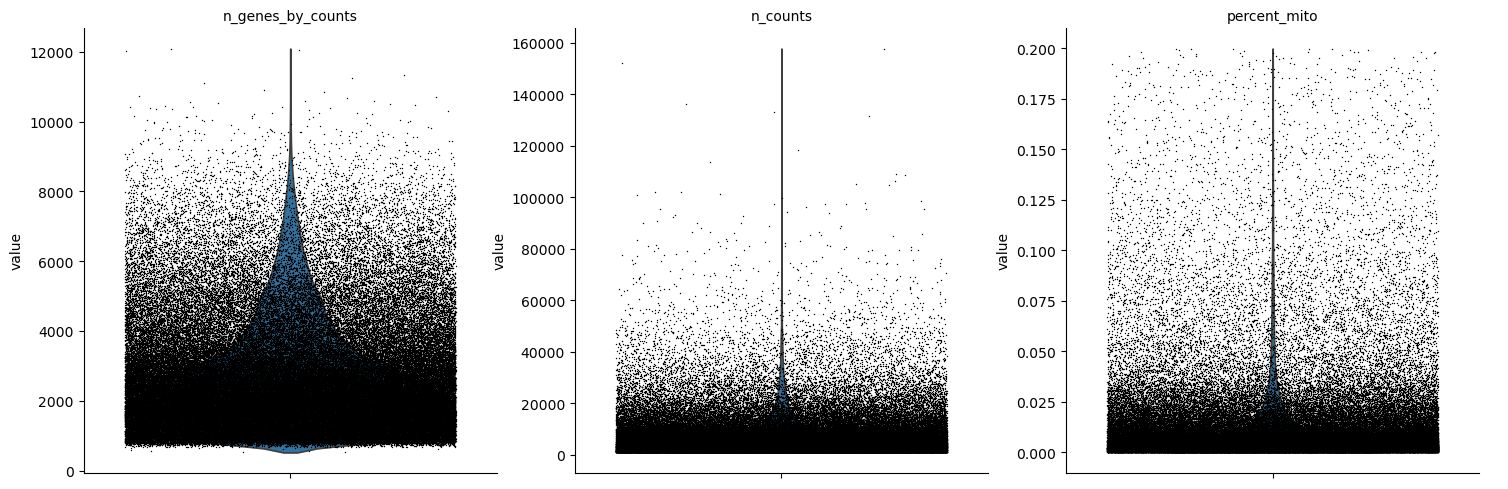

In [26]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "n_counts", "percent_mito"],
    jitter=0.4,
    multi_panel=True,
)

In [27]:
print(f"Number of cells before filtering: {adata.n_obs}")

cell_type_to_exclude = 'none'

# percentiles for filtering criteria
min_genes_percentile = 2
max_genes_percentile = 98
min_counts_percentile = 2
max_counts_percentile = 98
max_mito_percent = 30

min_genes = np.percentile(adata.obs['n_genes_by_counts'], min_genes_percentile)
max_genes = np.percentile(adata.obs['n_genes_by_counts'], max_genes_percentile)
min_counts = np.percentile(adata.obs['n_counts'], min_counts_percentile)
max_counts = np.percentile(adata.obs['n_counts'], max_counts_percentile)
max_mito = np.percentile(adata.obs['percent_mito'], max_mito_percent)

mask = (adata.obs['n_genes_by_counts'] >= min_genes) & (adata.obs['n_genes_by_counts'] <= max_genes) & \
        (adata.obs['n_counts'] >= min_counts) & (adata.obs['n_counts'] <= max_counts) & \
        (adata.obs['percent_mito'] <= max_mito) | (adata.obs.major_clust==cell_type_to_exclude)

adata = adata[mask, :]

print(f"Number of cells after filtering: {adata.n_obs}")

Number of cells before filtering: 136819
Number of cells after filtering: 39557


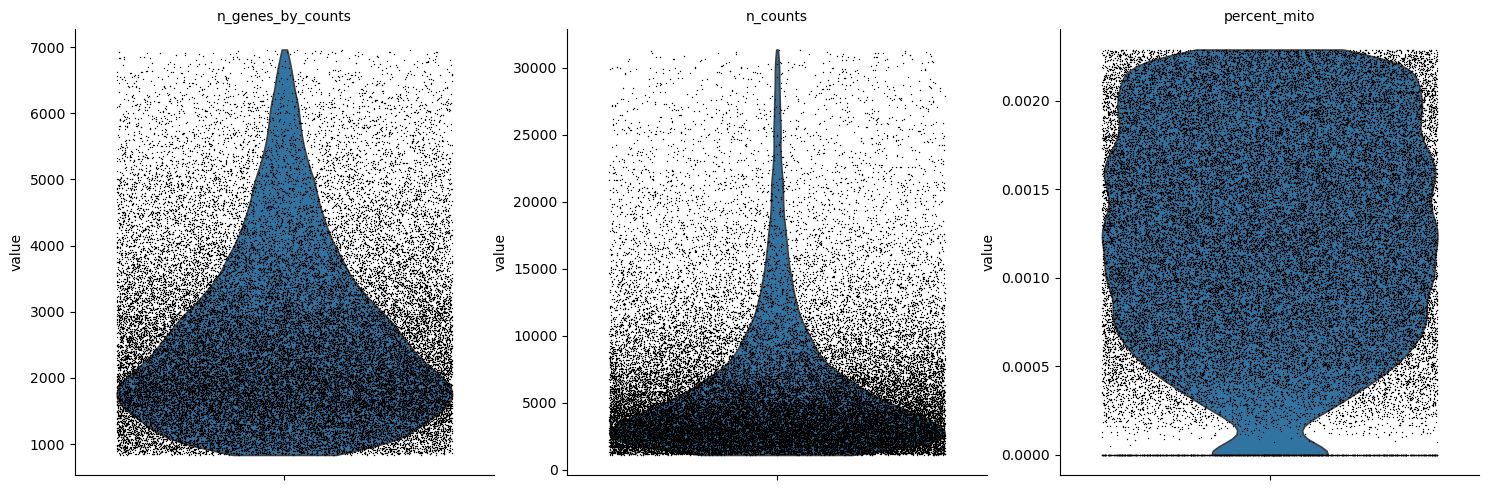

In [28]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "n_counts", "percent_mito"],
    jitter=0.4,
    multi_panel=True,
)

In [29]:
gc.collect()

4553

# Calculate mean expression of SRRM3/4 across cell types

In [30]:
# Calculate mean expression of SRRM3 across cell types
srrm3_means = adata[:, 'SRRM3'].to_df().groupby(adata.obs['sub_clust']).mean()
print("Mean SRRM3 expression by cell type:")
print(srrm3_means.sort_values(by='SRRM3', ascending=False))

Mean SRRM3 expression by cell type:
                     SRRM3
sub_clust                 
PV_WFDC2          7.097938
L3_CUX2_PRSS12    6.574562
PV_SULF1          6.484210
PV_SCUBE3         6.394366
L5-6_THEMIS_CNR1  5.854489
...                    ...
Micro             0.045551
Oligo-1           0.045095
Oligo_mat         0.044464
Oligo-3           0.043248
Micro_out         0.014925

[67 rows x 1 columns]


/beegfs/scratch/tmp/ipykernel_2207771/3613800413.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  srrm3_means = adata[:, 'SRRM3'].to_df().groupby(adata.obs['sub_clust']).mean()


In [31]:
# Calculate mean expression of SRRM3 across cell types
srrm4_means = adata[:, 'SRRM4'].to_df().groupby(adata.obs['sub_clust']).mean()
print("Mean SRRM4 expression by cell type:")
print(srrm4_means.sort_values(by='SRRM4', ascending=False))

Mean SRRM4 expression by cell type:
                      SRRM4
sub_clust                  
PV_SULF1          14.642105
PV_WFDC2          14.067010
VIP_KIRREL3        8.727273
L3_CUX2_PRSS12     7.951755
L5-6_TLE4_SORCS1   7.458791
...                     ...
Micro              0.055085
Oligo-1            0.053797
Oligo-2            0.053604
Oligo_mat          0.052310
Micro_out          0.052239

[67 rows x 1 columns]


/beegfs/scratch/tmp/ipykernel_2207771/3373124416.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  srrm4_means = adata[:, 'SRRM4'].to_df().groupby(adata.obs['sub_clust']).mean()


<Figure size 6000x1000 with 0 Axes>

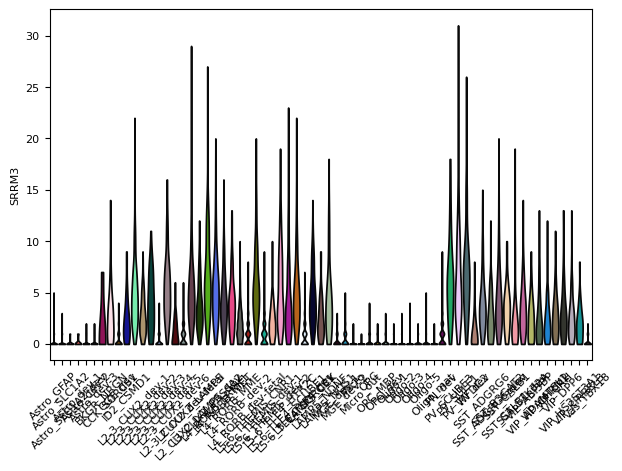

<Figure size 6000x1000 with 0 Axes>

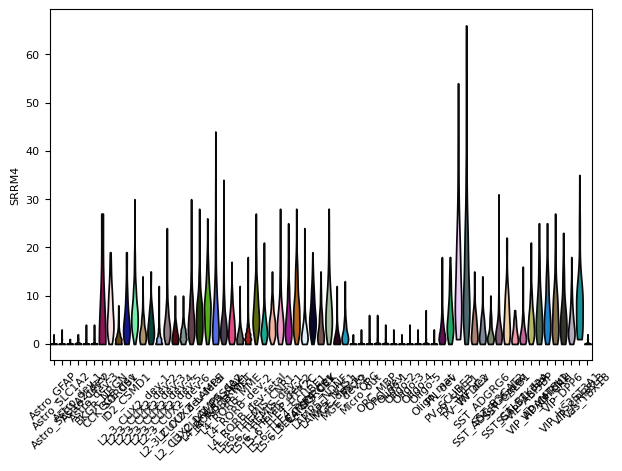

In [47]:
# Create violin plot for SRRM3
plt.figure(figsize=(60, 10))
sc.pl.violin(
    adata,
    ['SRRM3'],
    groupby='sub_clust', 
    rotation=45,  # Rotate x-axis labels for better readability
    show=False,   # Don't display yet to allow modifications
    jitter=0.4,   # Add jitter to show individual points better
    stripplot=False
)
plt.rcParams.update({'font.size': 8})
plt.subplots_adjust(bottom=0.2)  # Add space at bottom for rotated labels
plt.show()

# Create violin plot for SRRM4
plt.figure(figsize=(60, 10))
sc.pl.violin(
    adata,
    ['SRRM4'],
    groupby='sub_clust',
    rotation=45,  # Rotate x-axis labels for better readability 
    show=False,   # Don't display yet to allow modifications
    jitter=0.4,   # Add jitter to show individual points better
    stripplot=False
)
plt.rcParams.update({'font.size': 8})
plt.subplots_adjust(bottom=0.2)  # Add space at bottom for rotated labels
plt.show()

/beegfs/scratch/tmp/ipykernel_2207771/1187341721.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_exp[gene] = adata[:, gene].to_df().groupby(adata.obs['sub_clust']).mean()
/beegfs/scratch/tmp/ipykernel_2207771/1187341721.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_exp[gene] = adata[:, gene].to_df().groupby(adata.obs['sub_clust']).mean()


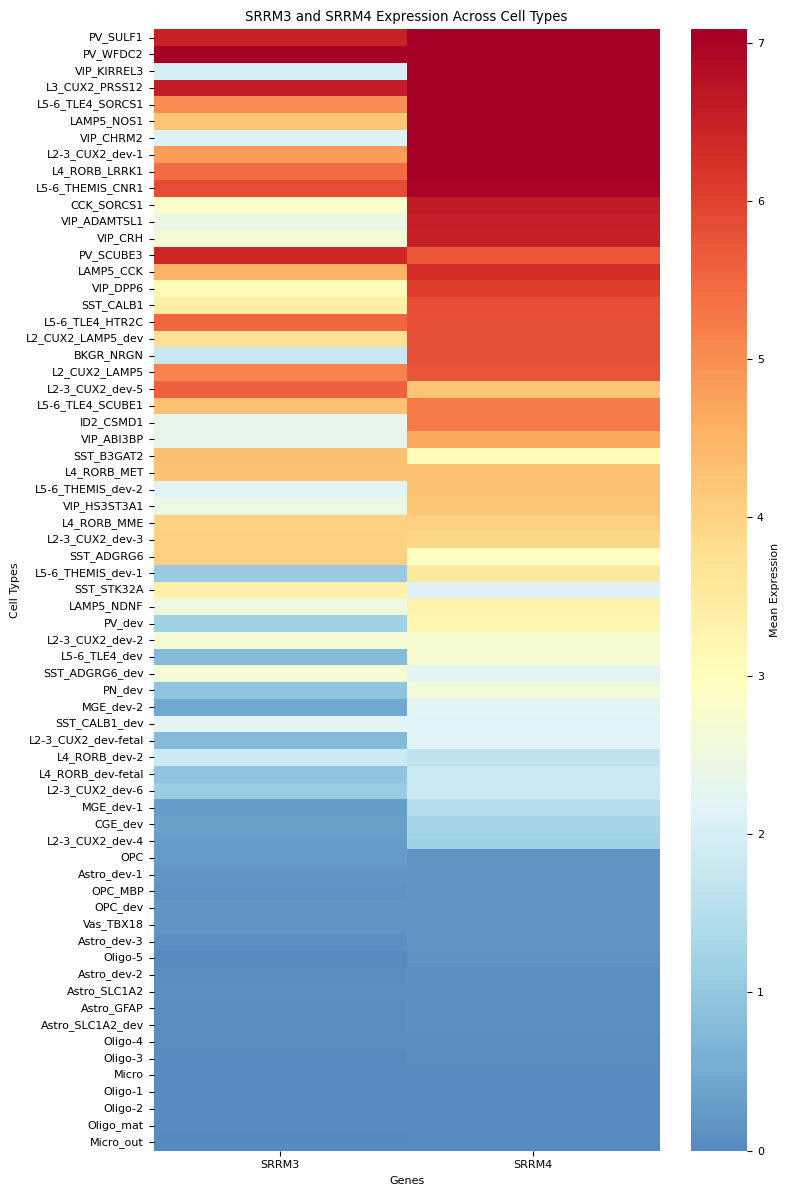

In [51]:
# Calculate mean expression for both genes
genes = ['SRRM3', 'SRRM4']
mean_exp = pd.DataFrame(index=adata.obs['sub_clust'].unique())

for gene in genes:
    mean_exp[gene] = adata[:, gene].to_df().groupby(adata.obs['sub_clust']).mean()

# Create figure
plt.figure(figsize=(8, 12))

# Sort rows by maximum expression
mean_exp['max'] = mean_exp.max(axis=1)
mean_exp_sorted = mean_exp.sort_values('max', ascending=False).drop('max', axis=1)

# Create heatmap with modified parameters
sns.heatmap(mean_exp_sorted, 
            cmap='RdYlBu_r',  # Red-Yellow-Blue reversed colormap
            center=mean_exp_sorted.mean().mean(),  # Center the colormap
            vmin=0,  # Set minimum value
            vmax=np.percentile(mean_exp_sorted.values, 95),  # Set maximum to 95th percentile
            cbar_kws={'label': 'Mean Expression'},
            yticklabels=True)

plt.title('SRRM3 and SRRM4 Expression Across Cell Types')
plt.xlabel('Genes')
plt.ylabel('Cell Types')

# Adjust layout
plt.tight_layout()
plt.show()